<a href="https://colab.research.google.com/github/dianavalverdedelariviera/S-S/blob/main/Parcial_1_Se%C3%B1ales_y_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 - Señales y sistemas 2024 -2
DIANA VALVERDE DE LA RIVIERA

# Pregunta 1

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

# Desarrollo
Defino la función para generar el cero y la pendiente en cada punto de la discretización.
En la práctica, el proceso de calcular líneas tangentes a una señal, es útil para aplicaciones como: el procesamiento de señales, donde la pendiente de una señal se puede utilizar para determinar la tasa de cambio de una cantidad física, como la temperatura, presión o velocidad.

In [ ]:
def my_ceropen(x,ymin = -3, ymax = 3): #Definimos la funcion ceropen para tomar la pendiente de cada punto discretizado en la señal
    xmax = max(x) # x.max()
    xmin = min(x) # x.min()
    m = (ymax - ymin)/(xmax - xmin)#pendiente de la recta a partir de 2 puntos
    c = ymin - m*xmin #corresponde al punto de intersección de la recta
    yv = m*x + c #Asignamos a yv la ecuacion de la recta análoga a y = mx + b
    return yv #retornamos las rectas

Al definir la función para cuantizar punto a punto, el proceso de cuantificación normalmente implica mapear cada valor continuo de la señal al valor discreto más cercano dentro de un rango específico. El rango de valores discretos suele estar determinado por el número de bits utilizados para representar la señal cuantificada.

In [ ]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind] #retorna un nuevo vector con atributos de ind

# Conversor análogo digital
Realicé la discretización de la señal de acuerdo a la frecuencia de muestreo Fs = 5000 Hz.
En dicho proceso el coversor convierte una señal analógica en una señal digital muestreando la señal en intervalos específicos y asignando un valor digital a cada muestra.

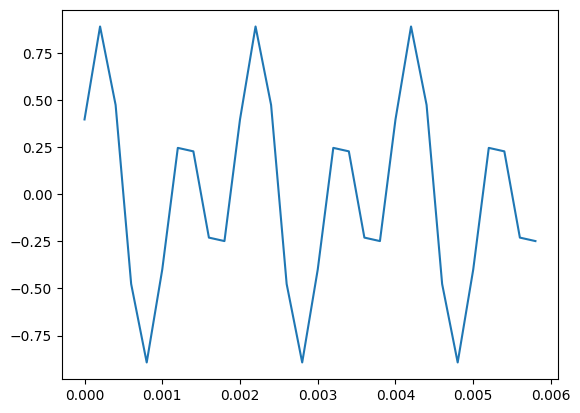

(30, 32)

In [ ]:
import numpy as np #importamos la librería numpy con el alias de np --> para que reciba los arreglos
import matplotlib.pyplot as plt #importamos la librería de matplotlib.pyplot co el alias de plt --> para graficar
from scipy.spatial.distance import cdist #importamos esta libreria para calcular distancias entre pares de puntos o conjuntos de puntos en un espacio vectorial

#Definimos la señal 1
w1 = 1000*np.pi #Velocidad angular
F1 = w1/(2*np.pi) #Frecuencia
T1 = 1/F1 #Periodo
A1= 0.3 #Amplitud

#Señal 2
w2 = 2000*np.pi
F2 = w2/(2*np.pi)
T2 = 1/F2
A2= 0.6

#Señal 3
w3 = 11000*np.pi
F3 = w3/(2*np.pi)
T3 = 1/F3
A3 = 0.1

Fs = 5000 #Fs corresponde al a fecuencia que nos dan en el ejercicio
Ts = 1/Fs #El periodo es inverso a la frecuencia
tv = np.arange(0,3*T1,Ts)#procesar tres periodos discretizados
#inicio en 0 y fin en 2 veces T1, dando saltos cada Ts (Está siguiendo al periodo de la señal más lenta)
y = 0.399*np.cos(w1*tv) + A2*np.sin(w2*tv) #Al discretizar la función original, encontramos que la señal 3 era copia de la señal 1 por tanto al tener la misma frecuencia se suman

#Mostramos en pantalla la señal
plt.plot(tv,y) #señal graficada
plt.show() #muestra la señal

#cero y pendiente
ycs = my_ceropen(y, ymin=-5,ymax=5) #Escalamos"y" de acuerdo a los valores que va tomando la pendiente en cada recta
#Establecemos los límites en el eje y, la amplitud más alta de la señal es 10, por tanto centralizamos la señal
#de -5 a 5 hay 10 unidades

#número de bits y vector de cuantización
nbits = 5
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

Para realizar la cuantificación, se recorre el vector cero y la señal discretizada, asegurando que cada muestra se procese de forma individual durante el proceso, garantizando una cuantificación precisa para cada valor.

In [ ]:
for i in range(ycs.shape[0]): #Para cada i que esté en el rango ()
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

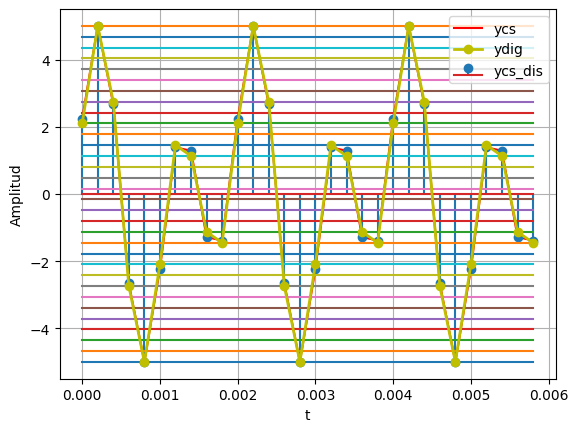

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Señal discretizada con la frecuencia apropiada
Al comprobar por medio de Nyquist, la fecuencia maxima entre las 3 señales dió mayor a la frecuencia otorgada en el ejercicio y por ende, para que la frecuencia sea apropiada debe ser:

Fs >= 2 * F(maxima) de (F1,F2,F3) --> Frecuencia de las señales.

 La frecuencia de discretización y la resolución de cuantificación son consideraciones importantes en la conversión de una señal analógica a una señal digital. La frecuencia de discretización debe ser lo suficientemente alta para capturar con precisión el componente de frecuencia más alta de la señal, mientras que la resolución de la cuantificación debe ser lo suficientemente alta para mantener la exactitud y precisión deseadas de la señal digital.

In [ ]:
ymin = float(input("Ingresa el valor mínimo de la señal: "))
ymax = float(input("Ingresa el valor máximo de la señal: "))

def my_ceropen(x,ymin, ymax): #Definimos la funcion ceropen para tomar la pendiente de cada punto discretizado en la señal
    xmax = max(x) # x.max()
    xmin = min(x) # x.min()
    m = (ymax - ymin)/(xmax - xmin)#pendiente de la recta a partir de 2 puntos
    c = ymin - m*xmin #corresponde al punto de intersección de la recta
    yv = m*x + c #Asignamos a yv la ecuacion de la recta análoga a y = mx + b
    return yv #retornamos las rectas

In [ ]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind] #retorna un nuevo vector con atributos de ind


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Señal 1
w1 = 1000*np.pi
F1 = w1/(2*np.pi)
T1 = 1/F1
A1= 0.3

#Señal 2
w2 = 2000*np.pi
F2 = w2/(2*np.pi)
T2 = 1/F2
A2= 0.6

#Señal 3
w3 = 11000*np.pi
F3 = w3/(2*np.pi)
T3 = 1/F3
A3 = 0.1

#cero y pendiente
ycs = my_ceropen(y, ymin,ymax) #escalamos "y" de acuerdo a los valores que va tomando la pendiente en cada recta

#número de bits y vector de cuantización
nbits = int(input("Ingresa el número de bits para la cuantización: "))
rmin = -5
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

# Validar nbits
if nbits < 1 or nbits > 16:
    raise ValueError("El número de bits debe estar entre 1 y 16.")

Fs = int(input("Ingresa la frecuencia de muestreo (Hz): ")) #Hicimos el cambio de la frecuencia a 2 la frecuencia máxima entre las 3 señales
Ts = 1/Fs
tv = np.arange(0,3*T1,Ts)#procesar dos periodos discretizados
y = 0.399*np.cos(w1*tv) + A2*np.sin(w2*tv)

# Determinar la frecuencia máxima de las señales
Fmax = max(w1, w2, w3) / (2 * np.pi)
if Fs < 2 * 11000:
    print("Advertencia: La frecuencia de muestreo no es adecuada según el teorema de Nyquist.")
else:
    print("La frecuencia de muestreo es adecuada.")

plt.plot(tv,y) #señal graficada
plt.show()

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

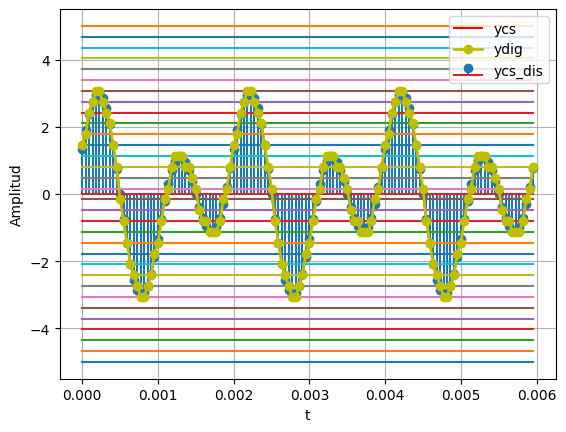

In [ ]:
#graficar señales

tv = tv[:min(len(tv), len(ycs))]
ycs = ycs[:len(tv)]

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Pregunta 2

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 03:13:34--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 74.125.137.139, 74.125.137.113, 74.125.137.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 03:13:34--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s  

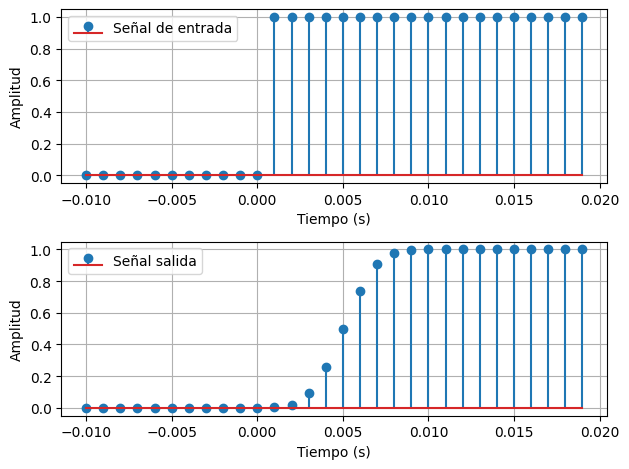

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

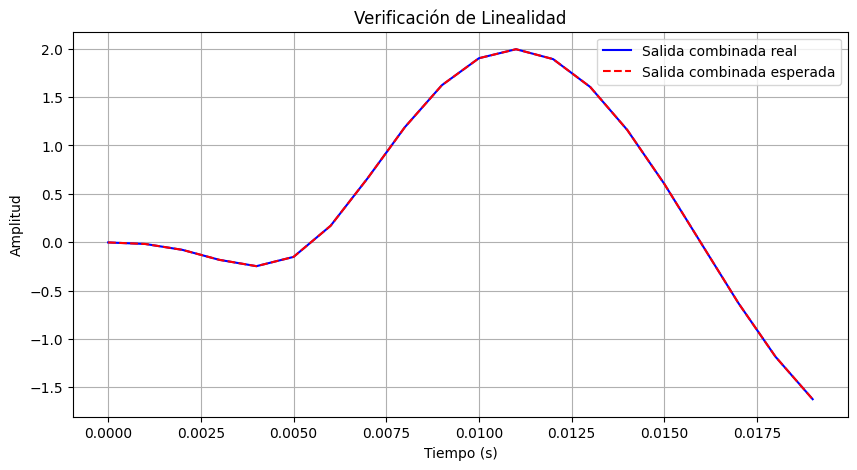

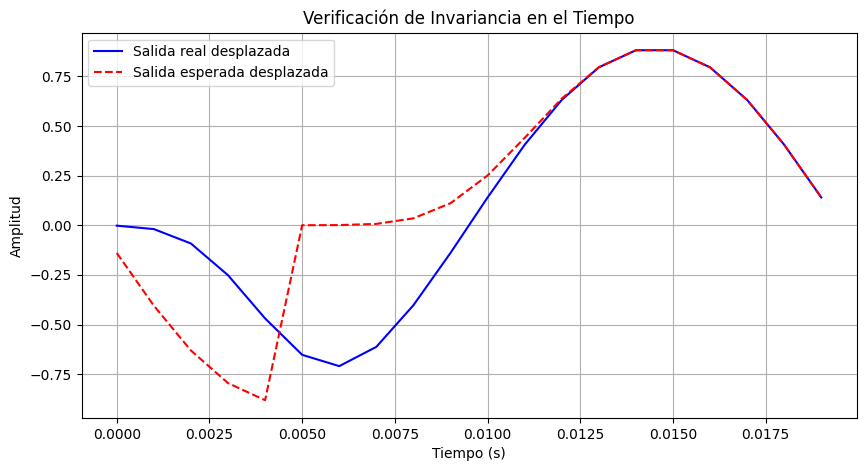

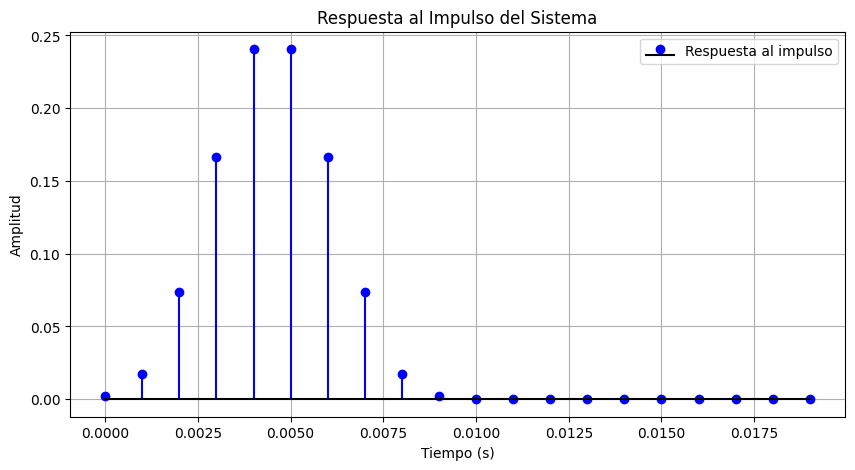

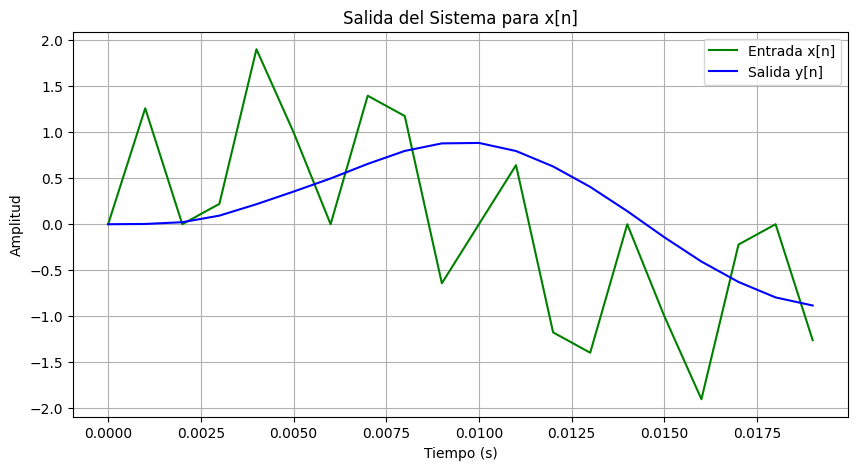

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from P1_model import system_

# Crear el sistema
my_system = system_.My_System()  # Inicializar el sistema
my_system.create_()  # Configurar el filtro
fs = my_system.fs  # Frecuencia de muestreo del sistema

# Crear el vector de tiempo
t = np.arange(0, 0.02, 1/fs)  # 20 ms de duración con la frecuencia de muestreo

# -----------------------------------------------
# Verificación de Linealidad
# -----------------------------------------------

# Generar señales de entrada
signal_1 = np.sin(2 * np.pi * 50 * t)  # Señal 1: Seno de 50 Hz
signal_2 = np.cos(2 * np.pi * 50 * t)  # Señal 2: Coseno de 50 Hz

# Generar las salidas individuales
y1 = my_system.predict(signal_1)  # Salida para señal 1
y2 = my_system.predict(signal_2)  # Salida para señal 2

# Generar la combinación lineal de señales
a, b = 2, -1  # Coeficientes para combinación lineal
signal_combined = a * signal_1 + b * signal_2  # Entrada combinada
y_combined = my_system.predict(signal_combined)  # Salida del sistema para entrada combinada

# Generar la salida esperada por linealidad
y_expected = a * y1 + b * y2  # Salida combinada esperada

# Graficar la verificación de linealidad
plt.figure(figsize=(10, 5))
plt.title("Verificación de Linealidad")
plt.plot(t, y_combined, label="Salida combinada real", color='blue')
plt.plot(t, y_expected, '--', label="Salida combinada esperada", color='red')
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# -----------------------------------------------
# Verificación de Invariancia en el Tiempo
# -----------------------------------------------

# Generar señal desplazada en el tiempo
delay = 0.005  # Retardo de 5 ms
signal_shifted = np.roll(signal_1, int(delay * fs))  # Entrada desplazada

# Obtener las salidas
y_shifted = my_system.predict(signal_shifted)  # Salida real para la entrada desplazada
y_shifted_expected = np.roll(y1, int(delay * fs))  # Salida esperada desplazada

# Graficar la verificación de invariancia
plt.figure(figsize=(10, 5))
plt.title("Verificación de Invariancia en el Tiempo")
plt.plot(t, y_shifted, label="Salida real desplazada", color='blue')
plt.plot(t, y_shifted_expected, '--', label="Salida esperada desplazada", color='red')
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# -----------------------------------------------
# Respuesta al Impulso
# -----------------------------------------------

# Crear un impulso unitario
impulse = np.zeros_like(t)  # Vector de ceros
impulse[0] = 1  # Impulso en el primer punto
impulse_response = my_system.predict(impulse)  # Respuesta al impulso del sistema

# Graficar la respuesta al impulso
plt.figure(figsize=(10, 5))
plt.title("Respuesta al Impulso del Sistema")
plt.stem(t, impulse_response, linefmt='b-', markerfmt='bo', basefmt='k', label="Respuesta al impulso")
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# -----------------------------------------------
# Salida del Sistema para x[n]
# -----------------------------------------------

# Definir la entrada x[n]
x_n = np.sin(100 * np.pi * t) + np.sin(600 * np.pi * t)  # Suma de dos frecuencias
y_n = my_system.predict(x_n)  # Salida del sistema para x[n]

# Graficar entrada y salida
plt.figure(figsize=(10, 5))
plt.title("Salida del Sistema para x[n]")
plt.plot(t, x_n, label="Entrada x[n]", color='green')
plt.plot(t, y_n, label="Salida y[n]", color='blue')
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()
